In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Maps

In [4]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 3.8MB/s 
     |████████████████████████████████| 6.5MB 40.4MB/s 
     |████████████████████████████████| 15.3MB 427kB/s 


In [5]:
!pip install geoplot

     |████████████████████████████████| 12.1MB 5.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 19.1MB 431kB/s 
     |████████████████████████████████| 225kB 38.0MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516161 sha256=2e91a72a9a34b9d7b5468ab13d230506cff5733c6a536f6d0bc44d84997482ed
  Stored in directory: /root/.cache/pip/wheels/45/7f/3b/37879587817fd1bbbee7b47312e2401b4f542cccf2fbe9b4ee
Successfully built cartopy
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37264 sha256=ace369b9e19a0bc0c63dd7342ba2c2639ddc5e63e73ecb62f6b9a2eb4348deaf
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf82605af8bc81d5ab44d987896dd
Successfully built pyshp


In [6]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs

## Provinces

In [7]:
# vn_provinces
path = '/content/drive/MyDrive/Colab Notebooks/practices/data/diaphantinh.geojson'
vn_provinces = gpd.read_file(path)
vn_provinces.drop(['gid', 'code'], axis=1, inplace=True)
vn_provinces.rename({'ten_tinh': 'province'}, axis=1, inplace=True)

print('vn_provinces shape: {}'.format(vn_provinces.shape))

vn_provinces shape: (63, 2)


In [8]:
vn_provinces.sample(5)

,province,geometry
28,Hòa Bình,"MULTIPOLYGON (((104.92032 21.07708, 104.92034 ..."
8,Bình Dương,"MULTIPOLYGON (((106.43608 11.50210, 106.44327 ..."
9,Bình Phước,"MULTIPOLYGON (((107.21940 12.20223, 107.22417 ..."
44,Quản Bình,"MULTIPOLYGON (((106.46825 17.87229, 106.46750 ..."
13,Cao Bằng,"MULTIPOLYGON (((105.56411 23.11317, 105.56613 ..."


In [9]:
# correct province names
vn_provinces.replace(
    to_replace={'province': {
        'Quản Bình': 'Quảng Bình',
        'Đăk Lăk': 'Đắk Lắk',
        'Đăk Nông': 'Đắk Nông',
        'Bà Rịa -Vũng Tàu': 'Bà Rịa - Vũng Tàu',
        'Kien Giang': 'Kiên Giang',
        # 'TP. Hồ Chí Minh': 'Tp. Hồ Chí Minh',
        'Cần Thơn': 'Cần Thơ',
    }},
    inplace=True
)
vn_provinces['province'].values

array(['An Giang', 'Bà Rịa - Vũng Tàu', 'Bắc Giang', 'Bắc Kạn',
       'Bạc Liêu', 'Bắc Ninh', 'Bến Tre', 'Bình Định', 'Bình Dương',
       'Bình Phước', 'Bình Thuận', 'Cà Mau', 'Cần Thơ', 'Cao Bằng',
       'Đà Nẵng', 'Đắk Lắk', 'Đắk Nông', 'Điện Biên', 'Đồng Nai',
       'Đồng Tháp', 'Gia Lai', 'Hà Giang', 'Hà Nam', 'Hà Nội', 'Hà Tĩnh',
       'Hải Dương', 'Hải Phòng', 'Hậu Giang', 'Hòa Bình', 'Hưng Yên',
       'Khánh Hòa', 'Kiên Giang', 'Kon Tum', 'Lai Châu', 'Lâm Đồng',
       'Lạng Sơn', 'Lào Cai', 'Long An', 'Nam Định', 'Nghệ An',
       'Ninh Bình', 'Ninh Thuận', 'Phú Thọ', 'Phú Yên', 'Quảng Bình',
       'Quảng Nam', 'Quảng Ngãi', 'Quảng Ninh', 'Quảng Trị', 'Sóc Trăng',
       'Sơn La', 'Tây Ninh', 'Thái Bình', 'Thái Nguyên', 'Thanh Hóa',
       'Thừa Thiên Huế', 'Tiền Giang', 'TP. Hồ Chí Minh', 'Trà Vinh',
       'Tuyên Quang', 'Vĩnh Long', 'Vĩnh Phúc', 'Yên Bái'], dtype=object)

In [10]:
# add province codes
vn_provinces['province_code'] = vn_provinces['province'].map({
    'Hà Nội': '01',
    'Hà Giang': '02',
    'Cao Bằng': '04',
    'Bắc Kạn': '06',
    'Tuyên Quang': '08',
    'Lào Cai': '10',
    'Điện Biên': '11',
    'Lai Châu': '12',
    'Sơn La': '14',
    'Yên Bái': '15',
    'Hòa Bình': '17',
    'Thái Nguyên': '19',
    'Lạng Sơn': '20',
    'Quảng Ninh': '22',
    'Bắc Giang': '24',
    'Phú Thọ': '25',
    'Vĩnh Phúc': '26',
    'Bắc Ninh': '27',
    'Hải Dương': '30',
    'Hải Phòng': '31',
    'Hưng Yên': '33',
    'Thái Bình': '34',
    'Hà Nam': '35',
    'Nam Định': '36',
    'Ninh Bình': '37',
    'Thanh Hóa': '38',
    'Nghệ An': '40',
    'Hà Tĩnh': '42',
    'Quảng Bình': '44',
    'Quảng Trị': '45',
    'Thừa Thiên Huế': '46',
    'Đà Nẵng': '48',
    'Quảng Nam': '49',
    'Quảng Ngãi': '51',
    'Bình Định': '52',
    'Phú Yên': '54',
    'Khánh Hòa': '56',
    'Ninh Thuận': '58',
    'Bình Thuận': '60',
    'Kon Tum': '62',
    'Gia Lai': '64',
    'Đắk Lắk': '66',
    'Đắk Nông': '67',
    'Lâm Đồng': '68',
    'Bình Phước': '70',
    'Tây Ninh': '72',
    'Bình Dương': '74',
    'Đồng Nai': '75',
    'Bà Rịa - Vũng Tàu': '77',
    'TP. Hồ Chí Minh': '79',
    'Long An': '80',
    'Tiền Giang': '82',
    'Bến Tre': '83',
    'Trà Vinh': '84',
    'Vĩnh Long': '86',
    'Đồng Tháp': '87',
    'An Giang': '89',
    'Kiên Giang': '91',
    'Cần Thơ': '92',
    'Hậu Giang': '93',
    'Sóc Trăng': '94',
    'Bạc Liêu': '95',
    'Cà Mau': '96'
})

In [11]:
# sort provinces by code
vn_provinces.sort_values('province_code', inplace=True)

In [12]:
# add 6 regions
dbsh = ['01', '26', '27', '22', '30', '31', '33', '34', '35', '36', '37']
tdmnpb = ['02', '04', '06', '08', '10', '15', '19', '20', '24', '25', '11', '12', '14', '17']
btb_dhmt = ['38', '40', '42', '44', '45', '46', '48', '49', '51', '52', '54', '56', '58', '60']
tn = ['62', '64', '66', '67', '68']
dnb = ['70', '72', '74', '75', '77', '79']
dbscl = ['80', '82', '83', '84', '86', '87', '89', '91', '92', '93', '94', '95', '96']

vn_provinces['region'] = '1'
vn_provinces.loc[vn_provinces['province_code'].isin(tdmnpb), 'region'] = '2'
vn_provinces.loc[vn_provinces['province_code'].isin(btb_dhmt), 'region'] = '3'
vn_provinces.loc[vn_provinces['province_code'].isin(tn), 'region'] = '4'
vn_provinces.loc[vn_provinces['province_code'].isin(dnb), 'region'] = '5'
vn_provinces.loc[vn_provinces['province_code'].isin(dbscl), 'region'] = '6'

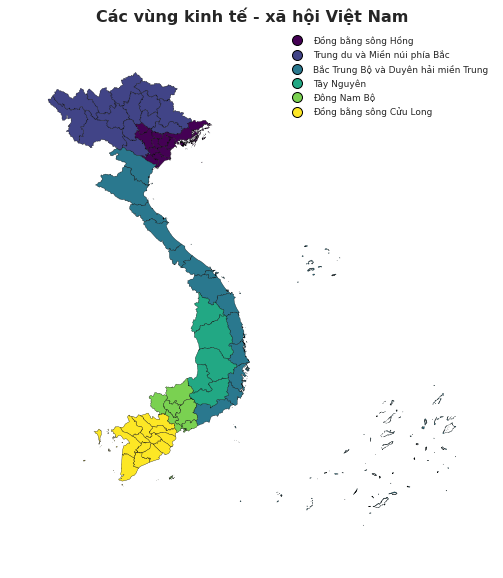

In [13]:
# map1: vietnam 6 regions
gplt.choropleth(
    df=vn_provinces,
    hue='region', cmap='viridis',
    edgecolor='black', linewidth=0.3,
    legend=True,
    legend_labels=[
        'Đồng bằng sông Hồng',
        'Trung du và Miền núi phía Bắc',
        'Bắc Trung Bộ và Duyên hải miền Trung',
        'Tây Nguyên',
        'Đông Nam Bộ',
        'Đồng bằng sông Cửu Long'
    ],
    legend_kwargs={'frameon': False, 'fontsize': 9},
    figsize=(10, 10)
)

plt.title('Các vùng kinh tế - xã hội Việt Nam', fontsize=16, fontweight='black')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/practices/es_dea_gplot/figure/map1')
plt.show()

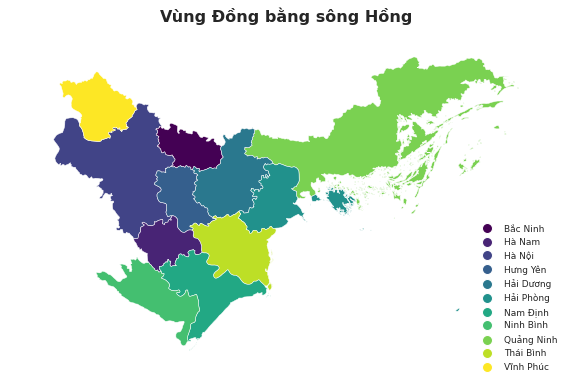

In [14]:
# map: red delta region
gplt.choropleth(
    df=vn_provinces.loc[vn_provinces['region'] == '1'],
    hue='province', cmap='viridis',
    edgecolor='white', linewidth=0.5,
    legend=True,
    legend_kwargs={'frameon': False, 'fontsize': 9},
    figsize=(10, 10),

)

plt.title('Vùng Đồng bằng sông Hồng', fontsize=16, fontweight='black')
plt.show()

### Maps: te by provinces

In [15]:
# rrd_districts_df
rrd_districts_df = pd.read_csv(
    '/content/drive/MyDrive/Colab Notebooks/practices/data/rrd_districts.csv',
    dtype={'tinh': str, 'huyen': str}
)
rrd_districts_df.sample(5)

,tinh,huyen,tsld,ts12,kqkd1,nns12,te_vrs,te_crs
43,31,304,13.000000,10185.500000,12106.750000,141.250000,0.670750,0.651997
59,35,350,52.000000,5663.000000,15685.000000,689.000000,0.983996,0.981460
52,33,328,191.285714,100685.571429,35103.571429,4573.700000,0.257468,0.251002
28,26,252,58.000000,8268.000000,14818.000000,125.000000,0.495778,0.473329
37,30,288,214.000000,236841.833333,122387.000000,6375.133333,0.728448,0.255975


In [16]:
# rrd_provinces_df
rrd_provinces_df = rrd_districts_df.groupby('tinh').agg('mean')
rrd_provinces_df = rrd_provinces_df.reset_index()
rrd_provinces_df

,tinh,tsld,ts12,kqkd1,nns12,te_vrs,te_crs
0,01,54.422232,27534.401078,32409.270871,1134.633378,0.618167,0.505643
1,26,171.423977,58717.689181,40717.517251,1823.670000,0.444971,0.386604
2,27,86.244614,44036.906217,49068.867560,2111.630211,0.562339,0.561158
3,30,190.000000,85268.336667,60096.360000,2805.163667,0.477525,0.302137
4,31,71.055556,102608.035714,47129.426587,930.058333,0.554606,0.399380
5,33,142.496764,152083.987973,39487.050366,7304.123077,0.455215,0.434991
6,34,239.944444,30477.988889,39843.255556,1262.688889,0.466303,0.310552
7,35,114.010582,57918.391005,44265.551323,710.443386,0.534621,0.517500
8,36,123.666667,56784.333333,5924.333333,1106.333333,0.376169,0.333296
9,37,229.333333,85009.500000,94532.333333,1679.333333,0.590952,0.351445


In [17]:
# create province centers
vn_provinces['centroid'] = vn_provinces.centroid
vn_provinces.sample(5)

,province,geometry,province_code,region,centroid
43,Phú Yên,"MULTIPOLYGON (((109.39067 12.82696, 109.39037 ...",54,3,POINT (109.05566 13.17039)
62,Yên Bái,"MULTIPOLYGON (((104.60800 22.29097, 104.60906 ...",15,2,POINT (104.56685 21.77769)
17,Điện Biên,"MULTIPOLYGON (((102.35845 22.48274, 102.35965 ...",11,2,POINT (103.02114 21.71122)
41,Ninh Thuận,"MULTIPOLYGON (((109.14637 11.57957, 109.14519 ...",58,3,POINT (108.86698 11.70655)
25,Hải Dương,"MULTIPOLYGON (((106.49708 21.22826, 106.49952 ...",30,1,POINT (106.35933 20.93098)


In [18]:
# merge data
map_df = vn_provinces.loc[vn_provinces['region'] == '1'].merge(
    right=rrd_provinces_df,
    how='left',
    left_on='province_code',
    right_on='tinh'
)
map_df.head()

,province,geometry,province_code,region,centroid,tinh,tsld,ts12,kqkd1,nns12,te_vrs,te_crs
0,Hà Nội,"MULTIPOLYGON (((105.82965 21.37512, 105.83067 ...",01,1,POINT (105.69874 20.99932),01,54.422232,27534.401078,32409.270871,1134.633378,0.618167,0.505643
1,Quảng Ninh,"MULTIPOLYGON (((107.34549 20.68667, 107.34411 ...",22,1,POINT (107.25341 21.23920),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Vĩnh Phúc,"MULTIPOLYGON (((105.58500 21.53527, 105.59105 ...",26,1,POINT (105.55755 21.36235),26,171.423977,58717.689181,40717.517251,1823.670000,0.444971,0.386604
3,Bắc Ninh,"MULTIPOLYGON (((106.03246 21.22488, 106.03217 ...",27,1,POINT (106.10462 21.11010),27,86.244614,44036.906217,49068.867560,2111.630211,0.562339,0.561158
4,Hải Dương,"MULTIPOLYGON (((106.49708 21.22826, 106.49952 ...",30,1,POINT (106.35933 20.93098),30,190.000000,85268.336667,60096.360000,2805.163667,0.477525,0.302137


In [19]:
# get coords of province centers
map_df['coords'] = [x.coords[:][0] for x in map_df['centroid']]
map_df.sample(5)

,province,geometry,province_code,region,centroid,tinh,tsld,ts12,kqkd1,nns12,te_vrs,te_crs,coords
4,Hải Dương,"MULTIPOLYGON (((106.49708 21.22826, 106.49952 ...",30,1,POINT (106.35933 20.93098),30,190.000000,85268.336667,60096.360000,2805.163667,0.477525,0.302137,"(106.35933347922916, 20.93097584039985)"
3,Bắc Ninh,"MULTIPOLYGON (((106.03246 21.22488, 106.03217 ...",27,1,POINT (106.10462 21.11010),27,86.244614,44036.906217,49068.867560,2111.630211,0.562339,0.561158,"(106.10461520499005, 21.110104578843977)"
7,Thái Bình,"MULTIPOLYGON (((106.60477 20.27758, 106.60447 ...",34,1,POINT (106.38733 20.50629),34,239.944444,30477.988889,39843.255556,1262.688889,0.466303,0.310552,"(106.38732564970675, 20.50629457676858)"
5,Hải Phòng,"MULTIPOLYGON (((107.72800 20.12807, 107.71875 ...",31,1,POINT (106.67351 20.80007),31,71.055556,102608.035714,47129.426587,930.058333,0.554606,0.399380,"(106.67351391496375, 20.800065611334883)"
9,Nam Định,"MULTIPOLYGON (((106.10474 19.89106, 106.10382 ...",36,1,POINT (106.20912 20.26620),36,123.666667,56784.333333,5924.333333,1106.333333,0.376169,0.333296,"(106.20912137805789, 20.266204718525778)"


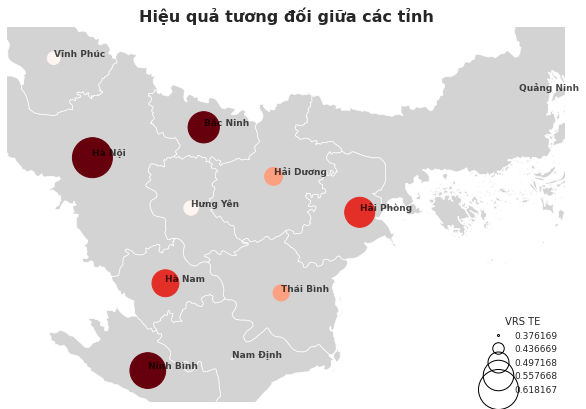

In [20]:
# map2: polyplot + pointplot + texts
ax = gplt.polyplot(
    df=map_df['geometry'],
    edgecolor='white', linewidth=0.7, facecolor='lightgray',
    figsize=(10, 10)
)

gplt.pointplot(
    df=map_df['centroid'],
    hue=map_df['te_vrs'], cmap='Reds',
    scale=map_df['te_vrs'], limits=(2, 40),
    scheme='Quantiles', # 'FisherJenks'
    legend=True, legend_var='scale',
    # legend_values = [],
    # legend_labels = [],
    legend_kwargs={'loc': 'best', 'fontsize': 9, 'frameon': False, 'title': 'VRS TE', 'title_fontsize': 10}, # 'lower right'
    ax=ax
)

for _, row in map_df.iterrows():
    plt.text(
        x=row['coords'][0],
        y=row['coords'][1],
        s=row['province'],
        # horizontalalignment='left',
        verticalalignment='bottom',
        fontdict={'alpha': 0.7, 'color': 'black', 'fontsize': 9, 'fontweight': 'semibold'}
    )

plt.title('Hiệu quả tương đối giữa các tỉnh', fontsize=16, fontweight='black')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/practices/es_dea_gplot/figure/map2')
plt.show()

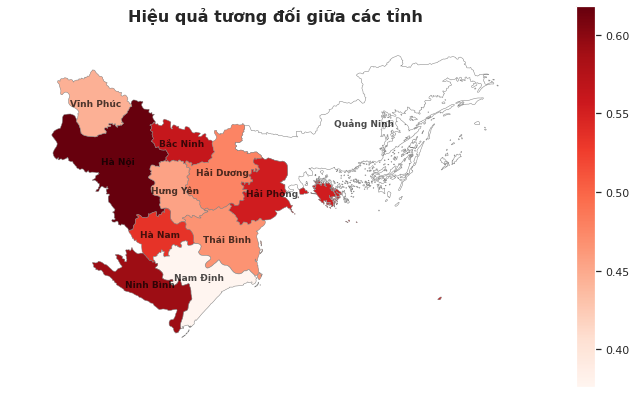

In [21]:
# map3: choropleth + texts
gplt.choropleth(
    df=map_df,
    hue='te_vrs', cmap='Reds',
    # scheme='Quantiles',
    edgecolor='grey', linewidth=0.5,
    legend=True,
    # legend_values = [],
    # legend_labels=[],
    # legend_kwargs={'loc': 'best', 'fontsize': 9, 'frameon': False, 'title': 'VRS TE', 'title_fontsize': 10}, # 'lower right'
    figsize=(12, 7)
)

for _, row in map_df.iterrows():
    plt.text(
        x=row['coords'][0],
        y=row['coords'][1],
        s=row['province'],
        horizontalalignment='center',
        verticalalignment='center',
        fontdict={'alpha': 0.7, 'color': 'black', 'fontsize': 9, 'fontweight': 'semibold'}
    )

plt.title('Hiệu quả tương đối giữa các tỉnh', fontsize=16, fontweight='black')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/practices/es_dea_gplot/figure/map3')
plt.show()

## Districts

In [22]:
# vn_districts
path = '/content/drive/MyDrive/Colab Notebooks/practices/data/diaphanhuyen.geojson'
vn_districts = gpd.read_file(path)
vn_districts.drop(['OBJECTID', 'f_code', 'Nam_TK', 'Code_vung'], axis=1, inplace=True)
vn_districts.rename({'Ten_Tinh': 'province', 'Ten_Huyen': 'district', 'Dan_So': 'population'}, axis=1, inplace=True)

print('vn_districts shape: {}'.format(vn_districts.shape))

vn_districts shape: (1561, 4)


In [23]:
# combine districts
vn_districts = vn_districts.dissolve(by=['province', 'district'], aggfunc='sum')
vn_districts.reset_index(inplace=True)

print('vn_districts shape: {}'.format(vn_districts.shape))

vn_districts shape: (702, 4)


In [24]:
vn_districts.sample(5)

,province,district,geometry,population
126,Cần Thơ,Phong Dien,"POLYGON ((105.70611 10.05508, 105.70878 10.055...",99328
646,Điện Biên,Tua Chua,"POLYGON ((103.38667 22.15728, 103.38827 22.156...",47279
321,Lào Cai,Muong Khuong,"POLYGON ((104.25709 22.84565, 104.26024 22.844...",52149
394,Phú Thọ,Cam Khe,"POLYGON ((105.19582 21.32957, 105.19842 21.322...",125790
158,Hà Nam,Binh Luc,"POLYGON ((106.01702 20.58291, 106.02244 20.580...",145718


In [25]:
# add province codes
vn_districts['province_code'] = vn_districts['province'].map({
    'Hà Nội': '01',
    'Hà Giang': '02',
    'Cao Bằng': '04',
    'Bắc Kạn': '06',
    'Tuyên Quang': '08',
    'Lào Cai': '10',
    'Điện Biên': '11',
    'Lai Châu': '12',
    'Sơn La': '14',
    'Yên Bái': '15',
    'Hòa Bình': '17',
    'Thái Nguyên': '19',
    'Lạng Sơn': '20',
    'Quảng Ninh': '22',
    'Bắc Giang': '24',
    'Phú Thọ': '25',
    'Vĩnh Phúc': '26',
    'Bắc Ninh': '27',
    'Hải Dương': '30',
    'Hải Phòng': '31',
    'Hưng Yên': '33',
    'Thái Bình': '34',
    'Hà Nam': '35',
    'Nam Định': '36',
    'Ninh Bình': '37',
    'Thanh Hóa': '38',
    'Nghệ An': '40',
    'Hà Tĩnh': '42',
    'Quảng Bình': '44',
    'Quảng Trị': '45',
    'Thừa Thiên Huế': '46',
    'Đà Nẵng': '48',
    'Quảng Nam': '49',
    'Quảng Ngãi': '51',
    'Bình Định': '52',
    'Phú Yên': '54',
    'Khánh Hòa': '56',
    'Ninh Thuận': '58',
    'Bình Thuận': '60',
    'Kon Tum': '62',
    'Gia Lai': '64',
    'Đắk Lắk': '66',
    'Đắk Nông': '67',
    'Lâm Đồng': '68',
    'Bình Phước': '70',
    'Tây Ninh': '72',
    'Bình Dương': '74',
    'Đồng Nai': '75',
    'Bà Rịa - Vũng Tàu': '77',
    'TP. Hồ Chí Minh': '79',
    'Long An': '80',
    'Tiền Giang': '82',
    'Bến Tre': '83',
    'Trà Vinh': '84',
    'Vĩnh Long': '86',
    'Đồng Tháp': '87',
    'An Giang': '89',
    'Kiên Giang': '91',
    'Cần Thơ': '92',
    'Hậu Giang': '93',
    'Sóc Trăng': '94',
    'Bạc Liêu': '95',
    'Cà Mau': '96'
})

In [26]:
# sort provinces by code
vn_districts.sort_values('province_code', inplace=True)

In [27]:
# add 6 regions
dbsh = ['01', '26', '27', '22', '30', '31', '33', '34', '35', '36', '37']
tdmnpb = ['02', '04', '06', '08', '10', '15', '19', '20', '24', '25', '11', '12', '14', '17']
btb_dhmt = ['38', '40', '42', '44', '45', '46', '48', '49', '51', '52', '54', '56', '58', '60']
tn = ['62', '64', '66', '67', '68']
dnb = ['70', '72', '74', '75', '77', '79']
dbscl = ['80', '82', '83', '84', '86', '87', '89', '91', '92', '93', '94', '95', '96']

vn_districts['region'] = '1'
vn_districts.loc[vn_districts['province_code'].isin(tdmnpb), 'region'] = '2'
vn_districts.loc[vn_districts['province_code'].isin(btb_dhmt), 'region'] = '3'
vn_districts.loc[vn_districts['province_code'].isin(tn), 'region'] = '4'
vn_districts.loc[vn_districts['province_code'].isin(dnb), 'region'] = '5'
vn_districts.loc[vn_districts['province_code'].isin(dbscl), 'region'] = '6'

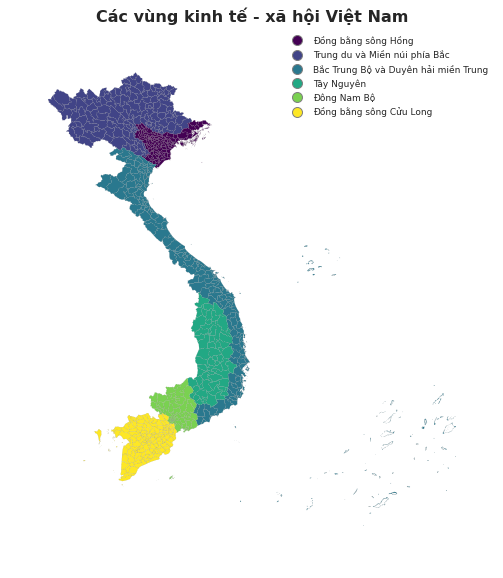

In [28]:
# map: vietnam 6 regions
gplt.choropleth(
    df=vn_districts,
    hue='region', cmap='viridis',
    edgecolor='grey', linewidth=0.1,
    legend=True,
    legend_labels=[
        'Đồng bằng sông Hồng',
        'Trung du và Miền núi phía Bắc',
        'Bắc Trung Bộ và Duyên hải miền Trung',
        'Tây Nguyên',
        'Đông Nam Bộ',
        'Đồng bằng sông Cửu Long'        
    ],
    legend_kwargs={'frameon': False, 'fontsize': 9},
    figsize=(10, 10)
)

plt.title('Các vùng kinh tế - xã hội Việt Nam', fontsize=16, fontweight='black')
plt.show()

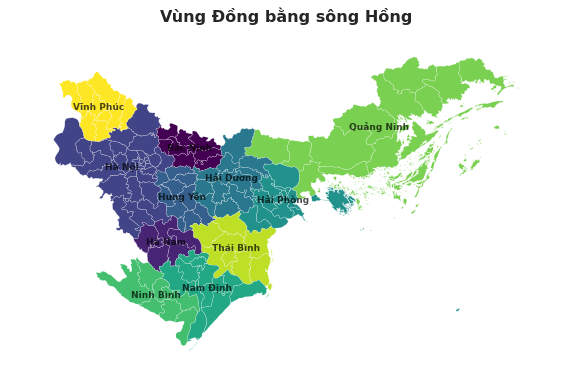

In [29]:
# map4: red delta region
gplt.choropleth(
    df=vn_districts.loc[vn_districts['region'] == '1'],
    hue='province', cmap='viridis',
    edgecolor='white', linewidth=0.2,
    # legend=True,
    # legend_kwargs={'frameon': False, 'fontsize': 9},
    figsize=(10, 10)
)

for _, row in map_df.iterrows():
    plt.text(
        x=row['coords'][0],
        y=row['coords'][1],
        s=row['province'],
        horizontalalignment='center',
        verticalalignment='center',
        fontdict={'alpha': 0.7, 'color': 'black', 'fontsize': 9, 'fontweight': 'semibold'}
    )

plt.title('Vùng Đồng bằng sông Hồng', fontsize=16, fontweight='black')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/practices/es_dea_gplot/figure/map4')
plt.show()

### add district codes

In [30]:
# Hà Nội
vn_districts.loc[vn_districts['province'] == 'Hà Nội', 'district_code'] = vn_districts['district'].map({
    'Ba Dinh':'001',
    'Hoan Kiem': '002',
    'Tay Ho': '003',
    'Long Bien': '004',
    'Cau Giay': '005',
    'Dong Da': '006',
    'Hai Ba Trung': '007',
    'Hoang Mai': '008',
    'Thanh Xuan': '009',
    'Soc Son': '016',
    'Dong Anh': '017',
    'Gia Lam': '018',
    'Tu Liem': '019',
    # 'Nam Tu Liem': '019'
    'Thanh Tri': '020',
    # 'Bac Tu Liem': '021',
    'Me Linh': '250',
    'Ha Dong': '268',
    'Son Tay': '269',
    'Ba Vi': '271',
    'Phuc Tho': '272',
    'Dan Phuong': '273',
    'Hoai Duc': '274',
    'Quoc Oai': '275',
    'Thach That': '276',
    'Chuong My': '277',
    'Thanh Oai': '278',
    'Thuong Tin': '279',
    'Phu Xuyen': '280',
    'Ung Hoa': '281',
    'My Duc': '282'
})

In [31]:
# Quảng Ninh
vn_districts.loc[vn_districts['province'] == 'Quảng Ninh', 'district_code'] = vn_districts['district'].map({
    'Ha Long': '193',
    'Mong Cai': '194',
    'Cam Pha': '195',
    'Uong Bi': '196',
    'Binh Lieu': '198',
    'Tien Yen': '199',
    'Dam Ha': '200',
    'Hai Ha': '201',
    'Ba Che': '202',
    'Van Don': '203',
    'Dong Trieu': '205',
    'Quang Yen': '206',
    'Co To': '207'
})

In [32]:
# Vĩnh Phúc
vn_districts.loc[vn_districts['province'] == 'Vĩnh Phúc', 'district_code'] = vn_districts['district'].map({
    'Vĩnh Yên': '243',
    'Phúc Yên': '244',
    'Lập Thạch': '246',
    'Tam Duong': '247',
    'Tam Đảo': '248',
    'Bình Xuyên': '249',
    'Yên Lạc': '251',
    'Vĩnh Tường': '252',
    'Sông Lô': '253'
})

In [33]:
# Bắc Ninh
vn_districts.loc[vn_districts['province'] == 'Bắc Ninh', 'district_code'] = vn_districts['district'].map({
    'Bac Ninh': '256',
    'Yen Phong': '258',
    'Que Vo': '259',
    'Tien Du': '260',
    'Tu Son': '261',
    'Thuan Thanh': '262',
    'Gia Binh': '263',
    'Luong Tai': '264'
})

In [34]:
# Hải Dương
vn_districts.loc[vn_districts['province'] == 'Hải Dương', 'district_code'] = vn_districts['district'].map({
    'Hai Duong': '288',
    'Chi Linh': '290',
    'Nam Sach': '291',
    'Kinh Mon': '292',
    'Kim Thanh': '293',
    'Thanh Ha': '294',
    'Cam Giang': '295',
    'Binh Giang': '296',
    'Gia Loc': '297',
    'Tu Ky': '298',
    'Ninh Giang': '299',
    'Thanh Mien': '300'
})

In [35]:
# Hải Phòng
vn_districts.loc[vn_districts['province'] == 'Hải Phòng', 'district_code'] = vn_districts['district'].map({
    'Hong Bang': '303',
    'Ngo Quyen': '304',
    'Le Chan': '305',
    'Hai An': '306',
    'Kien An': '307',
    'Do Son': '308',
    'Duong Kinh': '309',
    'Thuy Nguyen': '311',
    'An Dương': '312',
    'An Lao': '313',
    'Kien Thuy': '314',
    'Tien Lang': '315',
    'Vinh Bao': '316',
    'Cat Hai': '317',
    'Bach Long Vi': '318'
})

In [36]:
# Hưng Yên
vn_districts.loc[vn_districts['province'] == 'Hưng Yên', 'district_code'] = vn_districts['district'].map({
    'Hung Yen': '323',
    'Van Lam': '325',
    'Van Giang': '326',
    'Yen My': '327',
    'My Hao': '328',
    'An Thi': '329',
    'Khoai Chau': '330',
    'Kim Dong': '331',
    'Tien Lu': '332',
    'Phu Cu': '333'
})

In [37]:
# Thái Bình
vn_districts.loc[vn_districts['province'] == 'Thái Bình', 'district_code'] = vn_districts['district'].map({
    'Thái Bình': '336',
    'Quỳnh Phụ': '338',
    'Hưng Hà': '339',
    'Đông Hưng': '340',
    'Thái Thụy': '341',
    'Tiền Hải': '342',
    'Kiến Xương': '343',
    'Vũ Thư': '344'
})

In [38]:
# Hà Nam
vn_districts.loc[vn_districts['province'] == 'Hà Nam', 'district_code'] = vn_districts['district'].map({
    'Phu Ly': '347',
    'Duy Tien': '349',
    'Kim Bang': '350',
    'Thanh Liem': '351',
    'Binh Luc': '352',
    'Ly Nhan': '353'
})

In [39]:
# Nam Định
vn_districts.loc[vn_districts['province'] == 'Nam Định', 'district_code'] = vn_districts['district'].map({
    'Nam Dinh': '356',
    'My Loc': '358',
    'Vu Ban': '359',
    'Y Yen': '360',
    'Nghia Hung': '361',
    'Nam Truc': '362',
    'Truc Ninh': '363',
    'Xuan Truong': '364',
    'Giao Thuy': '365',
    'Hai Hau': '366'
})

In [40]:
# Ninh Bình
vn_districts.loc[vn_districts['province'] == 'Ninh Bình', 'district_code'] = vn_districts['district'].map({
    'Ninh Binh': '369',
    'Tam Diep': '370',
    'Nho Quan': '372',
    'Gia Vien': '373',
    'Hoa Lu': '374',
    'Yen Khanh': '375',
    'Kim Son': '376',
    'Yen Mo': ' 377'
})

In [41]:
rrd_districts = vn_districts.loc[vn_districts['region'] == '1']
rrd_districts.sample(5)

,province,district,geometry,population,province_code,region,district_code
461,Quảng Ninh,Ha Long,"MULTIPOLYGON (((107.15007 20.73468, 107.14922 ...",218830,22,1,193
177,Hà Nội,Long Bien,"POLYGON ((105.84409 21.08138, 105.84501 21.081...",226913,01,1,004
218,Hưng Yên,Khoai Chau,"POLYGON ((105.93538 20.89353, 105.93768 20.892...",181403,33,1,330
161,Hà Nam,Ly Nhan,"POLYGON ((105.99197 20.62948, 105.99335 20.629...",175878,35,1,353
171,Hà Nội,Gia Lam,"POLYGON ((105.91323 21.12309, 105.91990 21.122...",229735,01,1,018


### Maps: te by districts

In [42]:
# create district centers
rrd_districts['centroid'] = rrd_districts.centroid
rrd_districts.sample(5)

,province,district,geometry,population,province_code,region,district_code,centroid
89,Bắc Ninh,Yen Phong,"POLYGON ((106.00105 21.26232, 106.00487 21.261...",126660,27,1,258,POINT (105.97304 21.20904)
231,Hải Dương,Kim Thanh,"POLYGON ((106.41769 21.00093, 106.42019 20.999...",122482,30,1,293,POINT (106.48592 20.93696)
623,Vĩnh Phúc,Sông Lô,"POLYGON ((105.36885 21.52559, 105.36960 21.525...",88616,26,1,253,POINT (105.39527 21.43984)
235,Hải Dương,Thanh Ha,"POLYGON ((106.40908 20.97646, 106.41181 20.974...",153555,30,1,294,POINT (106.43064 20.89568)
556,Thái Bình,Thái Thụy,"MULTIPOLYGON (((106.60308 20.46667, 106.60248 ...",245493,34,1,341,POINT (106.52161 20.54562)


In [ ]:
# # get coords of district centers
# rrd_districts['coords'] = [x.coords[:][0] for x in rrd_districts['centroid']]
# rrd_districts.sample(5)

In [43]:
# merge data
map2_df = rrd_districts.merge(
    right=rrd_districts_df,
    how='left',
    left_on='district_code',
    right_on='huyen'
)
map2_df.head()

,province,district,geometry,population,province_code,region,district_code,centroid,tinh,huyen,tsld,ts12,kqkd1,nns12,te_vrs,te_crs
0,Hà Nội,Dan Phuong,"POLYGON ((105.65003 21.15468, 105.66039 21.152...",142480,01,1,273,POINT (105.67324 21.11349),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hà Nội,Son Tay,"POLYGON ((105.46825 21.17711, 105.47013 21.175...",125749,01,1,269,POINT (105.47518 21.10309),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hà Nội,Soc Son,"POLYGON ((105.80092 21.38598, 105.81112 21.384...",282536,01,1,016,POINT (105.82863 21.27367),01,016,230.0,113661.0,124639.0,800.0,0.786645,0.442316
3,Hà Nội,Quoc Oai,"POLYGON ((105.65105 21.04309, 105.65255 21.038...",160190,01,1,275,POINT (105.59964 20.96795),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hà Nội,Phuc Tho,"POLYGON ((105.60475 21.16508, 105.60633 21.164...",159484,01,1,272,POINT (105.58086 21.11349),01,272,3.0,1775.0,0.0,1.0,1.000000,0.000000


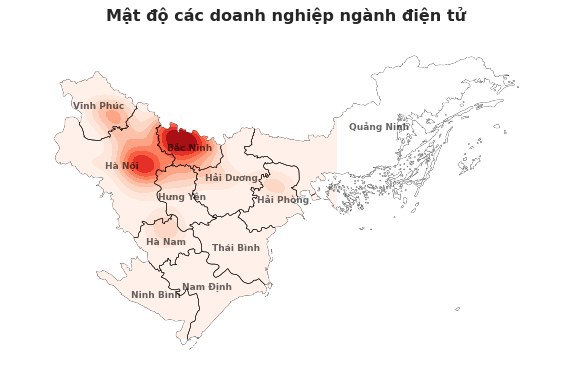

In [44]:
# map5: kdeplot
ind26_rrd_df=pd.read_csv(
    '/content/drive/MyDrive/Colab Notebooks/practices/data/ind26_rrd.csv',
    dtype={'tinh': str, 'huyen': str, 'xa': str, 'nganh_kd': str}
)

tmp_df = map2_df.merge(
    right=ind26_rrd_df[['huyen']],
    how='right',
    left_on='district_code',
    right_on='huyen'
).dropna()

ax = gplt.kdeplot(
    df=tmp_df['centroid'],
    n_levels=10, cmap='Reds', 
    shade=True, shade_lowest=True,
    clip=map_df,
    figsize=(10, 10)
)

gplt.polyplot(
    df=map_df,
    zorder=1,
    linewidth=0.5,
    ax=ax
)

for _, row in map_df.iterrows():
    plt.text(
        x=row['coords'][0],
        y=row['coords'][1],
        s=row['province'],
        horizontalalignment='center',
        verticalalignment='center',
        fontdict={'alpha': 0.6, 'color': 'black', 'fontsize': 9, 'fontweight': 'semibold'}
    )

plt.title('Mật độ các doanh nghiệp ngành điện tử', fontsize=16, fontweight='black')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/practices/es_dea_gplot/figure/map5')
plt.show()

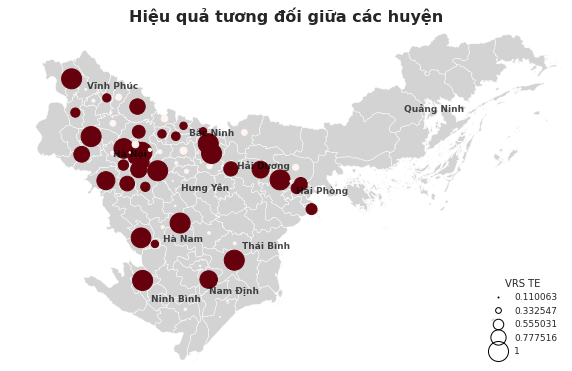

In [45]:
# map6: polyplot + pointplot + texts
ax = gplt.polyplot(
    df=map2_df['geometry'],
    edgecolor='white', linewidth=0.5, facecolor='lightgray',
    figsize=(10, 10)
)

gplt.pointplot(
    df=map2_df['centroid'],
    hue=map2_df['te_vrs'], cmap='Reds',
    scale=map2_df['te_vrs'], limits=(1, 20),
    scheme='Quantiles', # 'FisherJenks'
    legend=True, legend_var='scale',
    # legend_values = [],
    # legend_labels = [],
    legend_kwargs={'loc': 'lower right', 'fontsize': 9, 'frameon': False, 'title': 'VRS TE', 'title_fontsize': 10},
    ax=ax
)

for _, row in map_df.iterrows():
    plt.text(
        x=row['coords'][0],
        y=row['coords'][1],
        s=row['province'],
        # horizontalalignment='left',
        verticalalignment='bottom',
        fontdict={'alpha': 0.7, 'color': 'black', 'fontsize': 9, 'fontweight': 'semibold'}
    )

plt.title('Hiệu quả tương đối giữa các huyện', fontsize=16, fontweight='black')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/practices/es_dea_gplot/figure/map6')
plt.show()

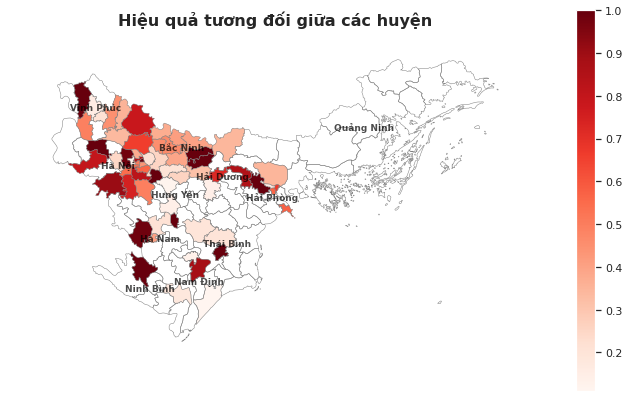

In [46]:
# map7: choropleth + texts
gplt.choropleth(
    df=map2_df,
    hue='te_vrs', cmap='Reds', # YlGnBu
    # scheme='Quantiles',
    edgecolor='grey', linewidth=0.5,
    legend=True,
    # legend_values = [],
    # legend_labels=[],
    # legend_kwargs={'loc': 'lower right', 'fontsize': 9, 'frameon': False, 'title': 'VRS TE', 'title_fontsize': 10},
    figsize=(12, 7)
)

for _, row in map_df.iterrows():
    plt.text(
        x=row['coords'][0],
        y=row['coords'][1],
        s=row['province'],
        horizontalalignment='center',
        verticalalignment='center',
        fontdict={'alpha': 0.7, 'color': 'black', 'fontsize': 9, 'fontweight': 'semibold'}
    )

plt.title('Hiệu quả tương đối giữa các huyện', fontsize=16, fontweight='black')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/practices/es_dea_gplot/figure/map7')
plt.show()